# Checking for class imbalance

The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

In [2]:
import pandas as pd
salaries = pd.read_csv("dataset/ds_salaries_clean.csv")
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [4]:
# Print the relative frequency of Job_Category
print(salaries["Designation"].value_counts(normalize = True))

Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager                    0.

# Cross-tabulation

Cross-tabulation can help identify how observations occur in combination.

In [5]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [7]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"]))

Company_Size                               L   M   S
Designation                                         
3D Computer Vision Researcher              0   1   0
AI Scientist                               2   2   3
Analytics Engineer                         0   4   0
Applied Data Scientist                     5   0   0
Applied Machine Learning Scientist         2   2   0
BI Data Analyst                            2   2   2
Big Data Architect                         0   1   0
Big Data Engineer                          4   2   2
Business Data Analyst                      4   1   0
Cloud Data Engineer                        1   0   1
Computer Vision Engineer                   0   4   2
Computer Vision Software Engineer          0   1   2
Data Analyst                              13  76   8
Data Analytics Engineer                    2   2   0
Data Analytics Lead                        1   0   0
Data Analytics Manager                     2   5   0
Data Architect                             3  

In [8]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

# Extracting features for correlation

In this exercise, you'll work with a version of the salaries dataset containing a new column called "`date_of_response`".Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

In [11]:
salaries.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Get the month of the response
# salaries["month"] = salaries["date_of_response"].dt.month

# # Extract the weekday of the response
# salaries["weekday"] = salaries["date_of_response"].dt.weekday

# # Create a heatmap
# sns.heatmap(salaries.corr(), annot=True)
# plt.show()

# Calculating salary percentiles

, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "`Salary_USD`" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

In [16]:
import numpy as np
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(.75)
print(twenty_fifth, salaries_median, seventy_fifth)

59893.0 96982.0 143225.0


# Categorizing salaries

Now it's time to make a new category! You'll use the variables `twenty_fifth`, `salaries_median`, and `seventy_fifth`, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "`salary_level`", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

In [18]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

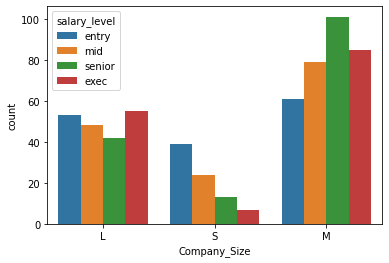

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, hue="salary_level", x="Company_Size")
plt.show()

# Comparing salaries

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

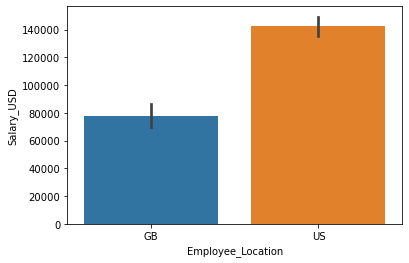

In [20]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

# Choosing a hypothesis

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. 
- CT = Contractor
- FL = 	Freelance
- PT = Part-time
- FT = Full-time

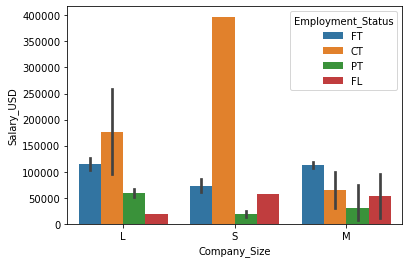

In [21]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

- On average, large companies pay contractors more than medium-sized companies